In [15]:

from bokeh.models import NumeralTickFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Title
import pandas as pd
import matplotlib.pyplot as plt
#names1 = ["Total_Co2_Emissions","Pol_Inst","Technologie","Shock","Lignite","Coal","CCGT","OCGT","Wind_Onshore","Wind_Offshore","Solar","LitIon","PSH","Total"]
data = pd.read_excel(r'Figures_Data_Preparation_9-12.xlsx', sheet_name = 'Figure 9-12', skiprows=[1])
#df = df.set_index([df.iloc[0], df.columns[0]])
data.head()

,Row,Total_CO2_Emissions,Pol_Inst,Technologie,Shock,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Lignite,Coal,CCGT,OCGT,Wind_Onshore,Wind_Offshore,Solar,LitIon,PSH,Mixed
0,1455555555,1503.6,CO2_Cap,Lignite,-0.1,455555555,1,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1535555555,1503.6,CO2_Cap,Gas,-0.2,535555555,2,3.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1545555555,1503.6,CO2_Cap,Gas,-0.1,545555555,2,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1553555555,1503.6,CO2_Cap,Hardcoal,-0.2,553555555,3,3.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1554555555,1503.6,CO2_Cap,Hardcoal,-0.1,554555555,3,4.0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data.dtypes

Row                      int64
Total_CO2_Emissions    float64
Pol_Inst                object
Technologie             object
Shock                  float64
Unnamed: 5               int64
Unnamed: 6               int64
Unnamed: 7             float64
Unnamed: 8             float64
Unnamed: 9             float64
Lignite                float64
Coal                     int64
CCGT                   float64
OCGT                   float64
Wind_Onshore           float64
Wind_Offshore          float64
Solar                  float64
LitIon                 float64
PSH                    float64
Mixed                  float64
dtype: object

In [17]:
data.columns


Index(['Row', 'Total_CO2_Emissions', 'Pol_Inst', 'Technologie', 'Shock',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Lignite', 'Coal', 'CCGT', 'OCGT', 'Wind_Onshore', 'Wind_Offshore',
       'Solar', 'LitIon', 'PSH', 'Mixed'],
      dtype='object')

In [18]:
data0 = data[['Technologie', "Shock", "Pol_Inst" ,'Lignite', 'Coal', 'CCGT', 'OCGT', 'Wind_Onshore', 'Wind_Offshore',
       'Solar', 'LitIon', 'PSH', 'Mixed']]

data0 = data0.loc[data['Technologie']!='no']
data0 = data0.loc[(data["Shock"] == -0.2) | (data["Shock"] == 0.2)]

data0



,Technologie,Shock,Pol_Inst,Lignite,Coal,CCGT,OCGT,Wind_Onshore,Wind_Offshore,Solar,LitIon,PSH,Mixed
1,Gas,-0.2,CO2_Cap,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Hardcoal,-0.2,CO2_Cap,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Demand,-0.2,CO2_Cap,0.0,0,-0.55,-0.58,-0.15,-0.15,-0.14,-0.53,-0.33,-0.22
7,Solar,-0.2,CO2_Cap,0.0,0,0.00,-0.01,-0.02,-0.04,-0.18,0.01,-0.01,-0.06
9,Wind_Onshore,-0.2,CO2_Cap,0.0,0,0.00,0.00,-0.17,-0.13,-0.07,-0.25,-0.03,-0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Solar,0.2,FIT,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
140,Demand,0.2,FIT,0.0,0,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00
142,Hardcoal,0.2,FIT,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
144,Gas,0.2,FIT,0.0,0,-0.01,-0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [19]:
data_co2_cap0 = data0.loc[data['Pol_Inst']=='CO2_Tax']

In [20]:
data_co2_cap = data_co2_cap0[['Technologie','Lignite', 'Coal', 'CCGT', 'OCGT', 'Wind_Onshore', 'Wind_Offshore',
       'Solar', 'LitIon', 'PSH', 'Mixed']]

In [21]:
data_co2_cap0

,Technologie,Shock,Pol_Inst,Lignite,Coal,CCGT,OCGT,Wind_Onshore,Wind_Offshore,Solar,LitIon,PSH,Mixed
73,Lignite,-0.2,CO2_Tax,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75,Gas,-0.2,CO2_Tax,0.0,0,0.00,0.00,0.00,-0.01,-0.01,-0.28,-0.11,-0.02
77,Hardcoal,-0.2,CO2_Tax,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
79,Demand,-0.2,CO2_Tax,0.0,0,-0.34,-0.40,-0.05,-0.04,-0.03,-0.25,-0.17,-0.09
81,Solar,-0.2,CO2_Tax,0.0,0,-0.02,-0.12,0.00,-0.01,-0.18,0.00,-0.02,-0.05
83,Wind_Onshore,-0.2,CO2_Tax,0.0,0,-0.01,-0.03,-0.17,-0.10,-0.01,-0.19,-0.04,-0.09
85,Wind_Offshore,-0.2,CO2_Tax,0.0,0,-0.03,-0.04,-0.14,-0.17,-0.05,-0.02,-0.04,-0.10
87,Lit_Ion,-0.2,CO2_Tax,0.0,0,0.00,0.00,0.00,0.00,0.00,-0.15,-0.02,0.00
89,PSH,-0.2,CO2_Tax,0.0,0,-0.01,-0.10,0.00,0.00,0.00,-0.09,-0.18,-0.01
93,PSH,0.2,CO2_Tax,0.0,0,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00


In [22]:
hue1 = ["#ADD8E6", "#414141", "#FFA500", "#fff340", "#00b8f2", "#a19595", "#f23333", "#2397fc"]

hue1

['#ADD8E6',
 '#414141',
 '#FFA500',
 '#fff340',
 '#00b8f2',
 '#a19595',
 '#f23333',
 '#2397fc']

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
df_melt=pd.melt(data_co2_cap,id_vars=['Technologie'], var_name='intensities', value_name='values')


In [24]:
df = df_melt[(df_melt[['values']] != 0).all(axis=1)]

df

,Technologie,intensities,values
39,Demand,CCGT,-0.34
40,Solar,CCGT,-0.02
41,Wind_Onshore,CCGT,-0.01
42,Wind_Offshore,CCGT,-0.03
44,PSH,CCGT,-0.01
52,Gas,CCGT,-0.02
57,Demand,OCGT,-0.40
58,Solar,OCGT,-0.12
59,Wind_Onshore,OCGT,-0.03
60,Wind_Offshore,OCGT,-0.04


In [25]:
data["Technologie"].unique()

#['Technologie','Lignite', 'Coal', 'CCGT', 'OCGT', 'Wind_Onshore', 'Wind_Offshore',
#       'Solar', 'LitIon', 'PSH', 'Total']

array(['Lignite', 'Gas', 'Hardcoal', 'Demand', 'Solar', 'Wind_Onshore',
       'Wind_Offshore', 'Lit_Ion', 'PSH', 'no'], dtype=object)

c:\users\shakh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


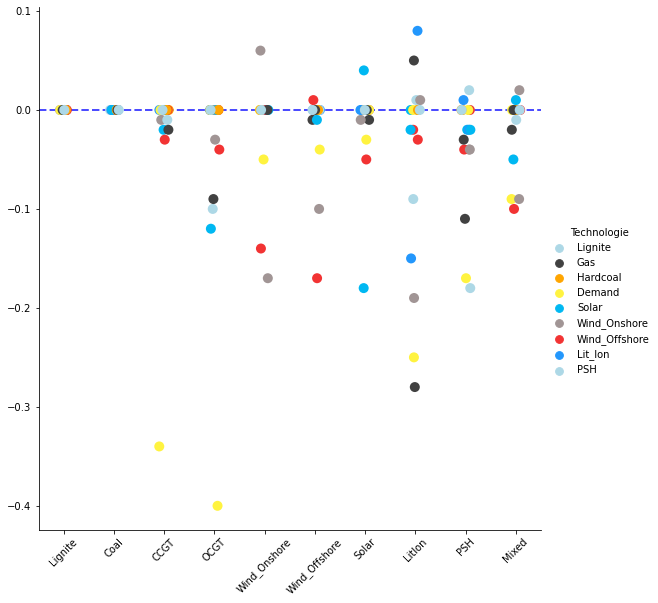

In [26]:
markers1 = {'Demand': '>', 'Hardcoal': "s", 'Solar': '<', 'Wind_Onshore' : '.',
       'Wind_Offshore' : ',', 'Lit_Ion': '-', 'PSH':'#'}
#    {"Lunch": "s", "Dinner": "X"}


sns.set_palette(sns.color_palette(hue1))
ax = sns.catplot(x="intensities", y="values", data=df_melt, s=10, size=8, hue='Technologie', palette = sns.color_palette(["#ADD8E6", "#414141", "#FFA500", "#fff340", "#00b8f2", "#a19595", "#f23333", "#2397fc"]))

ax.set_xticklabels(rotation = 45)

ax.axes[0][0].axhline(y = 0, ls='--', color='blue', linewidth=2, alpha=.7)

ax.set_axis_labels("","")
# ax.set_xlabels()
# ax.set_xlabel('')

In [27]:
df_melt.head(200)

,Technologie,intensities,values
0,Lignite,Lignite,0.00
1,Gas,Lignite,0.00
2,Hardcoal,Lignite,0.00
3,Demand,Lignite,0.00
4,Solar,Lignite,0.00
...,...,...,...
175,Solar,Mixed,0.01
176,Demand,Mixed,0.00
177,Hardcoal,Mixed,0.00
178,Gas,Mixed,0.00


In [28]:
ax.savefig("images\Figure10_CO2_Tax.png")